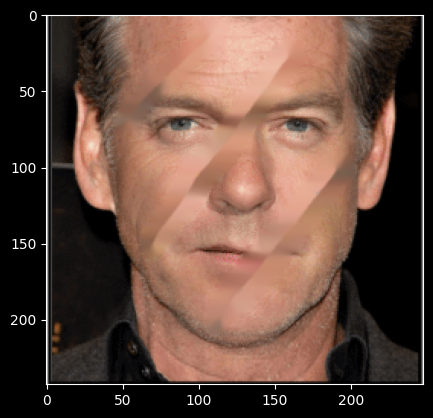

In [19]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("./Inpainting-Man.bmp")

# Create a mask (black for inpainting region, white for preserved areas)
mask = cv2.imread('Inpainting-Man mask.png', 0)

# Draw the inpainting region on the mask (using any drawing tool)
# Black color indicates the region to be inpainted

# Inpainting algorithm selection (choose one)
# inpaint_method = cv2.INPAINT_TELEA  # Fast Marching Method
inpaint_method = cv2.INPAINT_NS    # Navier-Stokes Method (might be slower)

# Inpaint the image
result = cv2.inpaint(image, mask, 3, inpaint_method)

# Display or save the inpainted image
import matplotlib.pyplot as plt
result=cv2.cvtColor(result,cv2.COLOR_BGR2RGB)
plt.imshow(result)